# Regression Case Study - Assignment - Machine Learning

## Tasks
- Step - 1: Load the data
- Step - 2: Perform the EDA on the given dataset
- Step - 3: Handle Categorical Columns i.e. convert them to numerical representation (Hint-Wisely choose between LabelEncoding and OneHotEncoding)
- Step - 4: Normalise the data
- Step - 5: Split the data - Test and Train (recommended 75:25 split)
- Step - 6: Apply all the ML Algorithms like Linear Regression(Simple and Multiple), Linear Regression with Polynomial Features, KNN, Decision Trees, etc...
- Step - 7: Evaluate your model
- Step - 8: Compare the different models and display the results.



## Description of the dataset

1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows=100
pd.options.display.max_columns=100
import hvplot.pandas

In [2]:
df=pd.read_csv("C:\\Users\\Sai Sidharth\\Downloads\\1446804-1374928-diamonds_dataset_and_description\\diamonds.csv")

In [3]:
df.shape

(53940, 10)

In [4]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [5]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    print('-'*30)
    print(col+':', '\n\n', ',  '.join(df[col].unique()), '\n')

------------------------------
cut: 

 Ideal,  Premium,  Good,  Very Good,  Fair 

------------------------------
color: 

 E,  I,  J,  H,  F,  G,  D 

------------------------------
clarity: 

 SI2,  SI1,  VS1,  VS2,  VVS2,  VVS1,  I1,  IF 



In [8]:
df.rename(columns={'x':'length','y':'width','z':'depth'})

carat        cut color clarity  depth  table  price  length  width  \
0       0.23      Ideal     E     SI2   61.5   55.0    326    3.95   3.98   
1       0.21    Premium     E     SI1   59.8   61.0    326    3.89   3.84   
2       0.23       Good     E     VS1   56.9   65.0    327    4.05   4.07   
3       0.29    Premium     I     VS2   62.4   58.0    334    4.20   4.23   
4       0.31       Good     J     SI2   63.3   58.0    335    4.34   4.35   
...      ...        ...   ...     ...    ...    ...    ...     ...    ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757    5.75   5.76   
53936   0.72       Good     D     SI1   63.1   55.0   2757    5.69   5.75   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757    5.66   5.68   
53938   0.86    Premium     H     SI2   61.0   58.0   2757    6.15   6.12   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757    5.83   5.87   

       depth  
0       2.43  
1       2.31  
2       2.31  
3       2.63  
4       2.75  
...      ...  
53935   3.50  
53936   3.61  
53937   3.56  
53938   3.74  
53939   3.64  

[53940 rows x 10 columns]

In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Ordinal encoding for cut, color and clarity

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color : diamond colour, from J (worst) to D (best)

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [10]:
cut_dict={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
color_dict={'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
clarity_dict={'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}

In [11]:
df['cut_ordinal']=df.cut.map(cut_dict)
df['color_ordinal']=df.color.map(color_dict)
df['clarity_ordinal']=df.clarity.map(clarity_dict)

In [12]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   cut_ordinal  color_ordinal  clarity_ordinal  
0            4              5                1  
1            3              5                2  
2            1              5                4  
3            3              1                3  
4            1              0                1

### Get value counts of those converted ordinal columns  

In [13]:
ordinal_values_count=df[['cut_ordinal','color_ordinal','clarity_ordinal']]
for i in ordinal_values_count.columns:
    print("\n"+ i)
    print(ordinal_values_count[i].value_counts())


cut_ordinal
4    21551
3    13791
2    12082
1     4906
0     1610
Name: cut_ordinal, dtype: int64

color_ordinal
3    11292
5     9797
4     9542
2     8304
6     6775
1     5422
0     2808
Name: color_ordinal, dtype: int64

clarity_ordinal
2    13065
3    12258
1     9194
4     8171
5     5066
6     3655
7     1790
0      741
Name: clarity_ordinal, dtype: int64


### Exploratory Data Analysis

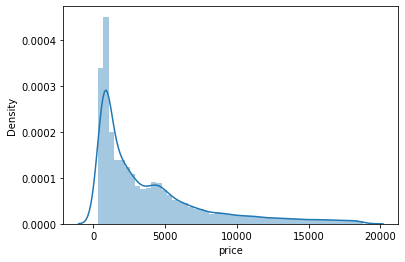

In [14]:
#Distribution Plot of Price 
sns.distplot(df['price'])
plt.show()

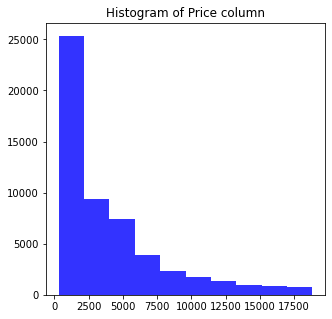

In [15]:
#Histogram
price=np.array(df['price'])
fig,ax=plt.subplots(figsize=(5,5))
ax.hist(price, bins=10, alpha=0.8,color='blue')
plt.title("Histogram of Price column")
plt.show()

In [16]:
df.hvplot.hist('price')

:Histogram   [price]   (price_count)

<AxesSubplot:>

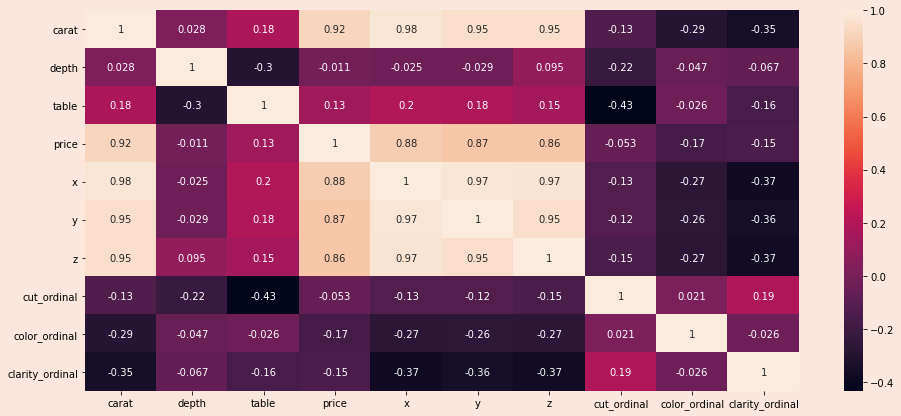

In [17]:
plt.figure(figsize = (16, 7), facecolor='#fbe7dd')
sns.heatmap(df.corr(),annot=True)

In [18]:
df1=df.drop(['price'],axis=1)

In [19]:
print(df.shape)
print(df1.shape)

(53940, 13)
(53940, 12)


In [20]:
corr_matrix=df1.corr().abs()

In [21]:
corr_matrix

carat     depth     table         x         y         z  \
carat            1.000000  0.028224  0.181618  0.975094  0.951722  0.953387   
depth            0.028224  1.000000  0.295779  0.025289  0.029341  0.094924   
table            0.181618  0.295779  1.000000  0.195344  0.183760  0.150929   
x                0.975094  0.025289  0.195344  1.000000  0.974701  0.970772   
y                0.951722  0.029341  0.183760  0.974701  1.000000  0.952006   
z                0.953387  0.094924  0.150929  0.970772  0.952006  1.000000   
cut_ordinal      0.134967  0.218055  0.433405  0.125565  0.121462  0.149323   
color_ordinal    0.291437  0.047279  0.026465  0.270287  0.263584  0.268227   
clarity_ordinal  0.352841  0.067384  0.160327  0.371999  0.358420  0.366952   

                 cut_ordinal  color_ordinal  clarity_ordinal  
carat               0.134967       0.291437         0.352841  
depth               0.218055       0.047279         0.067384  
table               0.433405       0.026465         0.160327  
x                   0.125565       0.270287         0.371999  
y                   0.121462       0.263584         0.358420  
z                   0.149323       0.268227         0.366952  
cut_ordinal         1.000000       0.020519         0.189175  
color_ordinal       0.020519       1.000000         0.025631  
clarity_ordinal     0.189175       0.025631         1.000000

In [22]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [23]:
to_drop=[column for column in upper.columns if any(upper[column] > 0.8)]

In [24]:
to_drop

['x', 'y', 'z']

In [25]:
df1.drop(to_drop,axis=1,inplace=True)

In [26]:
df1.shape

(53940, 9)

In [27]:
df1.head(2)

carat      cut color clarity  depth  table  cut_ordinal  color_ordinal  \
0   0.23    Ideal     E     SI2   61.5   55.0            4              5   
1   0.21  Premium     E     SI1   59.8   61.0            3              5   

   clarity_ordinal  
0                1  
1                2

In [28]:
df2=df1.corr()

<AxesSubplot:>

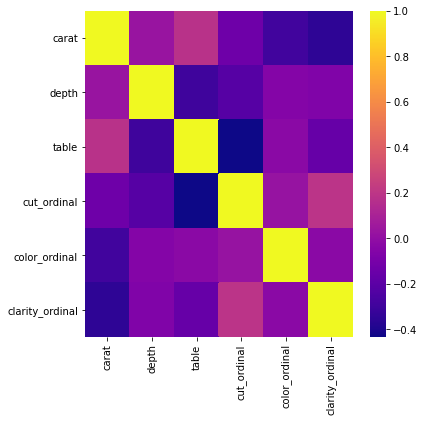

In [29]:
plt.figure(figsize=(6,6))
sns.heatmap(df2,cmap='plasma')

### Train Test Split

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, carat to clarity_ordinal
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            6 non-null      float64
 1   depth            6 non-null      float64
 2   table            6 non-null      float64
 3   cut_ordinal      6 non-null      float64
 4   color_ordinal    6 non-null      float64
 5   clarity_ordinal  6 non-null      float64
dtypes: float64(6)
memory usage: 336.0+ bytes


In [31]:
df1.head(1)

carat    cut color clarity  depth  table  cut_ordinal  color_ordinal  \
0   0.23  Ideal     E     SI2   61.5   55.0            4              5   

   clarity_ordinal  
0                1

In [32]:
df2.head(1)

carat     depth     table  cut_ordinal  color_ordinal  clarity_ordinal
carat    1.0  0.028224  0.181618    -0.134967      -0.291437        -0.352841

In [33]:
df.head(1)

carat    cut color clarity  depth  table  price     x     y     z  \
0   0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   

   cut_ordinal  color_ordinal  clarity_ordinal  
0            4              5                1

In [34]:
X=df['price']
Y= df[['carat','depth','table','cut_ordinal','color_ordinal','clarity_ordinal']]

In [35]:
print(X.shape)
print(type(X))
print(Y.shape)

(53940,)
<class 'pandas.core.series.Series'>
(53940, 6)


### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40455,)
(13485,)
(40455, 6)
(13485, 6)


In [39]:
print(type(X_test))

<class 'pandas.core.series.Series'>


In [40]:
X_train=X_train.to_frame()
X_test=X_test.to_frame()

In [41]:
type(X_train)

pandas.core.frame.DataFrame

In [42]:
type(X_test)

pandas.core.frame.DataFrame

In [43]:
type(Y_test)

pandas.core.frame.DataFrame

In [44]:
type(Y_train)

pandas.core.frame.DataFrame

In [45]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### Different algorithms
1. Linear Regression
2. Robust Regression
3. Polynomial Regression
4. Ridge Regression
5. LASSO Regression
6. Elastic Net Regression
7. Stochastic Gradient Descent Regression
8. Support Vector Machine Regression
9. Decision Tree Regression

### Scaling of Data 

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('min_max_scalar', MinMaxScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

### 1. Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [48]:
print(lin_reg.intercept_)

[ 0.40317952 61.7508791  57.21373249  2.96155464  3.67234103  3.26667484]


In [49]:
pred = lin_reg.predict(X_test)

In [50]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.09868917291422
MSE: 2.3040366497411178
RMSE: 1.5179053494013115
R2 Square 0.1538015358021006
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0922469294467858
MSE: 2.277266968195095
RMSE: 1.5090616184222219
R2 Square 0.15309413992370352
__________________________________


In [51]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

Model       MAE       MSE      RMSE  R2 Square
0  Linear Regression  1.098689  2.304037  1.517905   0.153802

### Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='auto', tol=0.0001, random_state=42)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.0995603930052564
MSE: 2.3045057563116056
RMSE: 1.5180598658523337
R2 Square 0.1532966465920993
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0930647346907338
MSE: 2.277440411706673
RMSE: 1.5091190846671687
R2 Square 0.1527079109899828
__________________________________


In [53]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(Y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  R2 Square
0  Linear Regression  1.098689  2.304037  1.517905   0.153802
1   Ridge Regression  1.099560  2.304506  1.518060   0.153297

### Lasso Regression

In [54]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.5, 
              precompute=True,  
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.1488101165244602
MSE: 2.3775605788671133
RMSE: 1.5419340384293725
R2 Square -4.1457766410032036e-05
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.1425832378810055
MSE: 2.3460168284724046
RMSE: 1.531671253393627
R2 Square -5.438242448955558e-14
__________________________________


In [55]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(Y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  R2 Square
0  Linear Regression  1.098689  2.304037  1.517905   0.153802
1   Ridge Regression  1.099560  2.304506  1.518060   0.153297
2   Lasso Regression  1.148810  2.377561  1.541934  -0.000041

### Elastic Net 

In [56]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.1467032804796715
MSE: 2.3751180855653895
RMSE: 1.5411418122825002
R2 Square 0.010889234624740488
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.1404466956149588
MSE: 2.3435430490144555
RMSE: 1.530863497838542
R2 Square 0.010990194258427344
__________________________________


In [57]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(Y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  R2 Square
0       Linear Regression  1.098689  2.304037  1.517905   0.153802
1        Ridge Regression  1.099560  2.304506  1.518060   0.153297
2        Lasso Regression  1.148810  2.377561  1.541934  -0.000041
3  Elastic Net Regression  1.146703  2.375118  1.541142   0.010889

### Polynomial Regression - Second Degree 

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,Y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.0885734746822218
MSE: 2.280758608924799
RMSE: 1.5102180666793783
R2 Square 0.16823220752173454
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0832291409650436
MSE: 2.2569699250253543
RMSE: 1.5023215118693316
R2 Square 0.16571420735764206
__________________________________


In [59]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression Second Degree", *evaluate(Y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square',])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  \
0                    Linear Regression  1.098689  2.304037  1.517905   
1                     Ridge Regression  1.099560  2.304506  1.518060   
2                     Lasso Regression  1.148810  2.377561  1.541934   
3               Elastic Net Regression  1.146703  2.375118  1.541142   
4  Polynomial Regression Second Degree  1.088573  2.280759  1.510218   

   R2 Square  
0   0.153802  
1   0.153297  
2  -0.000041  
3   0.010889  
4   0.168232

### Polynomial Regression - Third Degree

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)

X_train_3_d = poly_reg.fit_transform(X_train)
X_test_3_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_3_d,Y_train)

test_pred = lin_reg.predict(X_test_3_d)
train_pred = lin_reg.predict(X_train_3_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.0822417971026372
MSE: 2.2595611246103484
RMSE: 1.5031836629668207
R2 Square 0.17704795648324426
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0765592315222154
MSE: 2.2364988831516492
RMSE: 1.4954928562690124
R2 Square 0.17471867377455444
__________________________________


In [61]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression Third Degree", *evaluate(Y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square',])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  \
0                    Linear Regression  1.098689  2.304037  1.517905   
1                     Ridge Regression  1.099560  2.304506  1.518060   
2                     Lasso Regression  1.148810  2.377561  1.541934   
3               Elastic Net Regression  1.146703  2.375118  1.541142   
4  Polynomial Regression Second Degree  1.088573  2.280759  1.510218   
5   Polynomial Regression Third Degree  1.082242  2.259561  1.503184   

   R2 Square  
0   0.153802  
1   0.153297  
2  -0.000041  
3   0.010889  
4   0.168232  
5   0.177048

### Polynomial Regression - Fourth Degree

In [62]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)

X_train_4_d = poly_reg.fit_transform(X_train)
X_test_4_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_4_d,Y_train)

test_pred = lin_reg.predict(X_test_4_d)
train_pred = lin_reg.predict(X_train_4_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.0811721942741597
MSE: 2.2562955416627353
RMSE: 1.5020970480174494
R2 Square 0.17843697224551883
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0754815601606975
MSE: 2.2335824171338383
RMSE: 1.4945174529371807
R2 Square 0.17595652986380808
__________________________________


In [63]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression Fourth Degree", *evaluate(Y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square',])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  \
0                    Linear Regression  1.098689  2.304037  1.517905   
1                     Ridge Regression  1.099560  2.304506  1.518060   
2                     Lasso Regression  1.148810  2.377561  1.541934   
3               Elastic Net Regression  1.146703  2.375118  1.541142   
4  Polynomial Regression Second Degree  1.088573  2.280759  1.510218   
5   Polynomial Regression Third Degree  1.082242  2.259561  1.503184   
6  Polynomial Regression Fourth Degree  1.081172  2.256296  1.502097   

   R2 Square  
0   0.153802  
1   0.153297  
2  -0.000041  
3   0.010889  
4   0.168232  
5   0.177048  
6   0.178437

### Robust Regression 

In [64]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, Y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.267259567808382
MSE: 3.3719454805499662
RMSE: 1.836285784008025
R2 Square -0.24224834073579618
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.265042042432654
MSE: 3.3715091928921663
RMSE: 1.8361669839347854
R2 Square -0.25126914833149977
__________________________________


In [65]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(Y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  \
0                    Linear Regression  1.098689  2.304037  1.517905   
1                     Ridge Regression  1.099560  2.304506  1.518060   
2                     Lasso Regression  1.148810  2.377561  1.541934   
3               Elastic Net Regression  1.146703  2.375118  1.541142   
4  Polynomial Regression Second Degree  1.088573  2.280759  1.510218   
5   Polynomial Regression Third Degree  1.082242  2.259561  1.503184   
6  Polynomial Regression Fourth Degree  1.081172  2.256296  1.502097   
7                    Robust Regression  1.267260  3.371945  1.836286   

   R2 Square  
0   0.153802  
1   0.153297  
2  -0.000041  
3   0.010889  
4   0.168232  
5   0.177048  
6   0.178437  
7  -0.242248

### Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100,bootstrap=True)
rf_reg.fit(X_train, Y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.0968338678679734
MSE: 2.4974820955943544
RMSE: 1.580342398214499
R2 Square 0.08929783968873384
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8406221534968555
MSE: 1.512298826841934
RMSE: 1.229755596385694
R2 Square 0.44963324110918906
__________________________________


In [67]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(Y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square',])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  \
0                    Linear Regression  1.098689  2.304037  1.517905   
1                     Ridge Regression  1.099560  2.304506  1.518060   
2                     Lasso Regression  1.148810  2.377561  1.541934   
3               Elastic Net Regression  1.146703  2.375118  1.541142   
4  Polynomial Regression Second Degree  1.088573  2.280759  1.510218   
5   Polynomial Regression Third Degree  1.082242  2.259561  1.503184   
6  Polynomial Regression Fourth Degree  1.081172  2.256296  1.502097   
7                    Robust Regression  1.267260  3.371945  1.836286   
8              Random Forest Regressor  1.096834  2.497482  1.580342   

   R2 Square  
0   0.153802  
1   0.153297  
2  -0.000041  
3   0.010889  
4   0.168232  
5   0.177048  
6   0.178437  
7  -0.242248  
8   0.089298

# Using Get dummies

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows=100
pd.options.display.max_columns=100
import hvplot.pandas

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [69]:
data=pd.read_csv("C:\\Users\\Sai Sidharth\\Downloads\\1446804-1374928-diamonds_dataset_and_description\\diamonds.csv")

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [71]:
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [72]:
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [73]:
object_columns = data.select_dtypes(include='object').columns

for col in object_columns:
    print('-'*50)
    print(col+':', '\n\n', ',  '.join(data[col].unique()), '\n')
print('-'*50)

--------------------------------------------------
cut: 

 Ideal,  Premium,  Good,  Very Good,  Fair 

--------------------------------------------------
color: 

 E,  I,  J,  H,  F,  G,  D 

--------------------------------------------------
clarity: 

 SI2,  SI1,  VS1,  VS2,  VVS2,  VVS1,  I1,  IF 

--------------------------------------------------


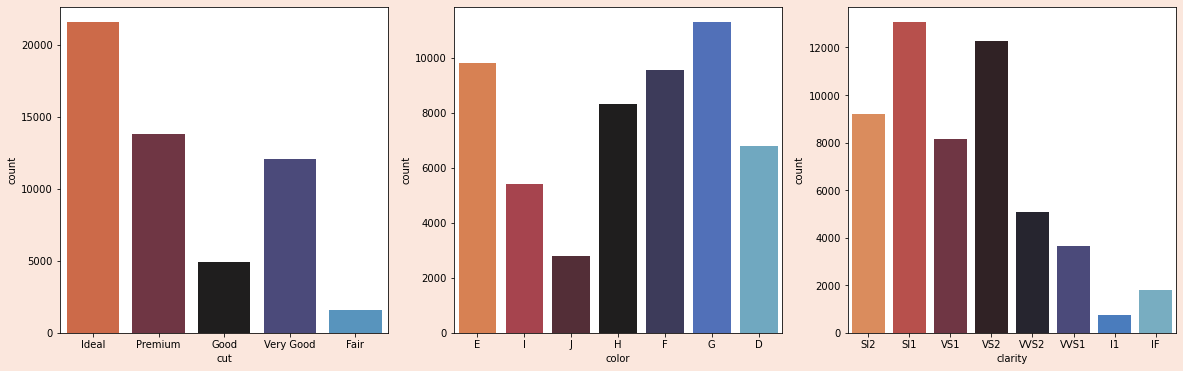

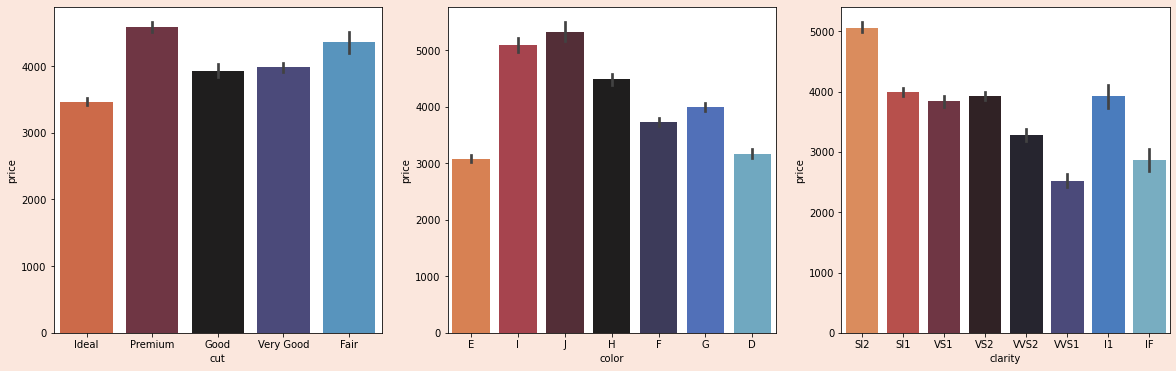

In [74]:
cols = object_columns

fig = plt.figure(figsize = (20, 6), facecolor='#fbe7dd')



for i in range(len(cols)):
    fig.add_subplot(1, 3, i+1)
    sns.countplot(data[cols[i]], palette='icefire_r')
plt.show() 

fig = plt.figure(figsize = (20, 6), facecolor='#fbe7dd')
for i in range(len(cols)):
    fig.add_subplot(1, 3, i+1)
    sns.barplot(x=cols[i], y="price", data=data, palette='icefire_r')

plt.show()

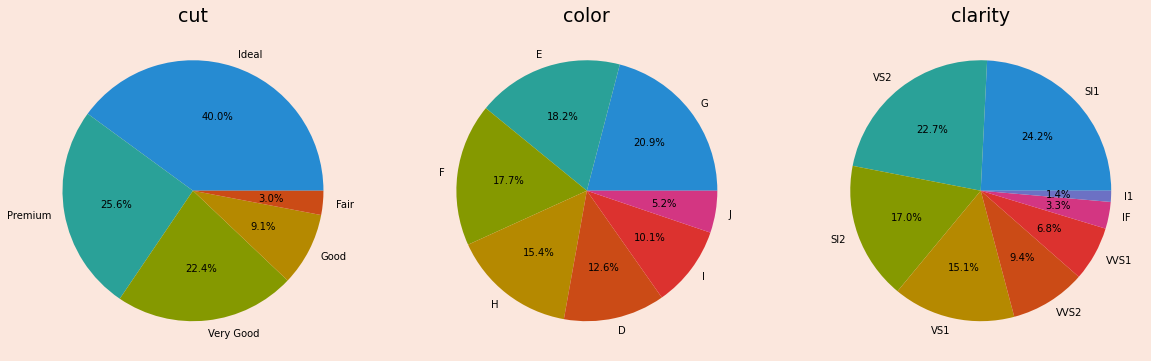

In [75]:
fig = plt.figure(figsize = (20, 6), facecolor='#fbe7dd')

for i in range(len(cols)):
    plt.style.use('Solarize_Light2')
    fig.add_subplot(1, 3, i+1)
    plt.title("%s" % cols[i],color = 'black',fontsize = 19)
    plt.pie(
        x=data[cols[i]].value_counts().values, labels=data[cols[i]].value_counts().index, autopct = '%1.1f%%'
    )

plt.show()

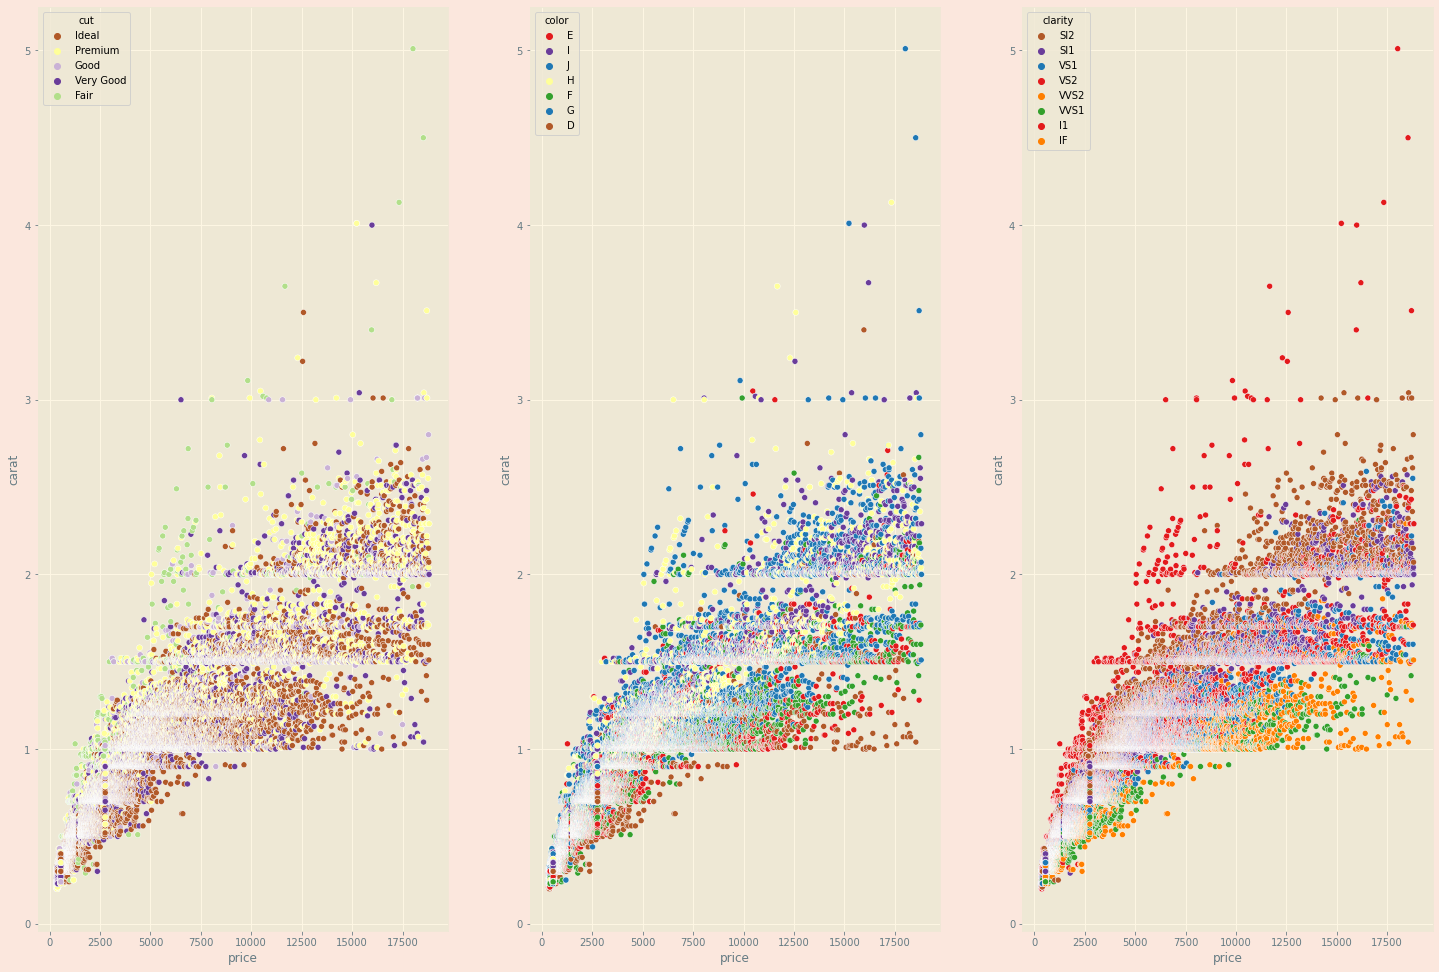

In [76]:
cols = object_columns

fig = plt.figure(figsize = (25, 17), facecolor='#fbe7dd')



for i in range(len(cols)):
    fig.add_subplot(1, 3, i+1)
    sns.scatterplot(
        y=data['carat'], x=data['price'], hue=data[cols[i]], palette='Paired', hue_order=data[cols[i]], markers=None
    )

plt.show()

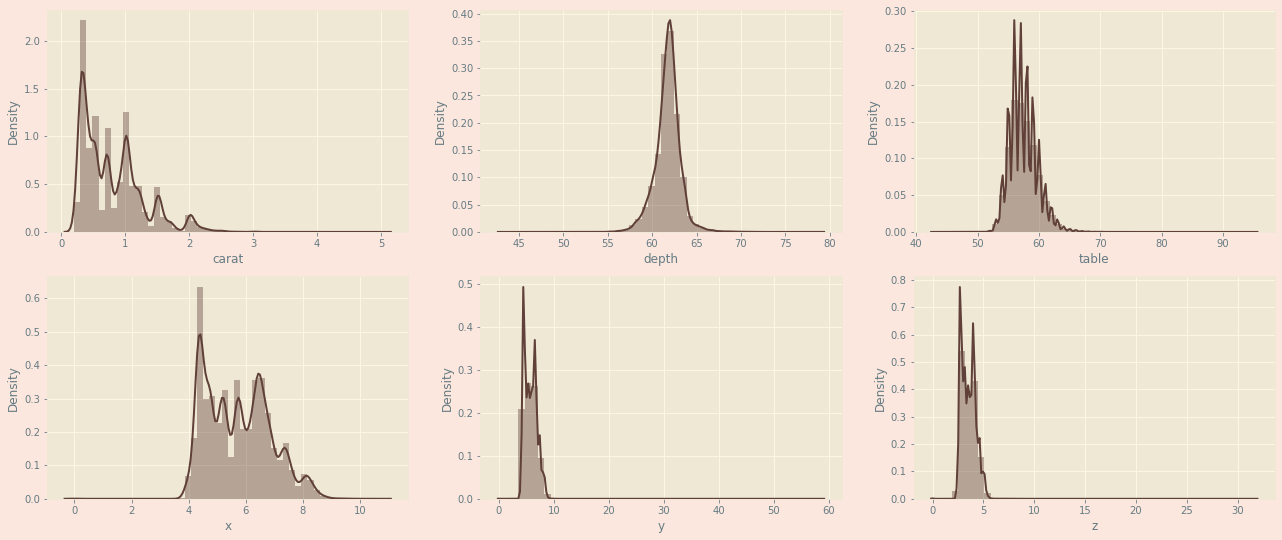

In [77]:
float_columns = data.select_dtypes(include='float64').columns

fig = plt.figure(figsize = (22, 9), facecolor='#fbe7dd')



for i in range(len(float_columns)):
    fig.add_subplot(2, 3, i+1)
    sns.distplot(data[float_columns[i]], color='#604039')

plt.show()

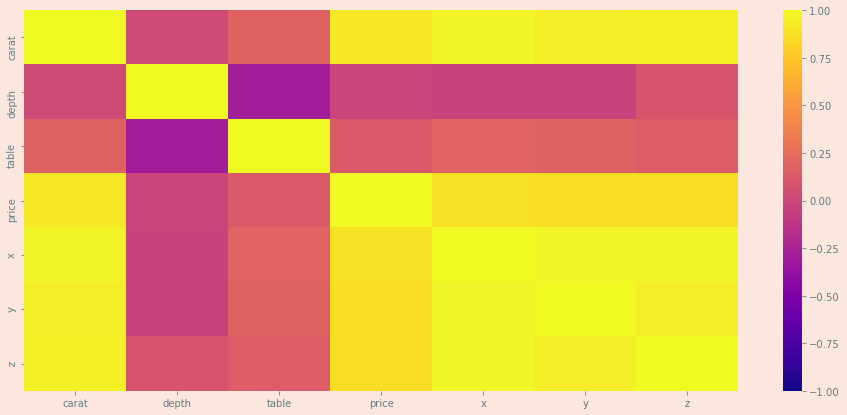

In [78]:
# correlation matrix

plt.figure(figsize = (16, 7), facecolor='#fbe7dd')
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap= 'plasma')
plt.show()

In [79]:
y=data['price']

In [80]:
#Assigning the featurs as df_tran

df_tran = pd.get_dummies(data[["cut", 'color','clarity']])
df_tran['carat'] = MinMaxScaler().fit_transform(pd.DataFrame(data['carat']))
df_tran['table'] = MinMaxScaler().fit_transform(pd.DataFrame(data['table']))
df_tran['depth'] = MinMaxScaler().fit_transform(pd.DataFrame(data['depth']))
df_tran.head()

cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_D  \
0         0         0          1            0              0        0   
1         0         0          0            1              0        0   
2         0         1          0            0              0        0   
3         0         0          0            1              0        0   
4         0         1          0            0              0        0   

   color_E  color_F  color_G  color_H  color_I  color_J  clarity_I1  \
0        1        0        0        0        0        0           0   
1        1        0        0        0        0        0           0   
2        1        0        0        0        0        0           0   
3        0        0        0        0        1        0           0   
4        0        0        0        0        0        1           0   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0           0            0            1            0            0   
1           0            1            0            0            0   
2           0            0            0            1            0   
3           0            0            0            0            1   
4           0            0            1            0            0   

   clarity_VVS1  clarity_VVS2     carat     table     depth  
0             0             0  0.006237  0.230769  0.513889  
1             0             0  0.002079  0.346154  0.466667  
2             0             0  0.006237  0.423077  0.386111  
3             0             0  0.018711  0.288462  0.538889  
4             0             0  0.022869  0.288462  0.563889

In [81]:
df_tran.shape

(53940, 23)

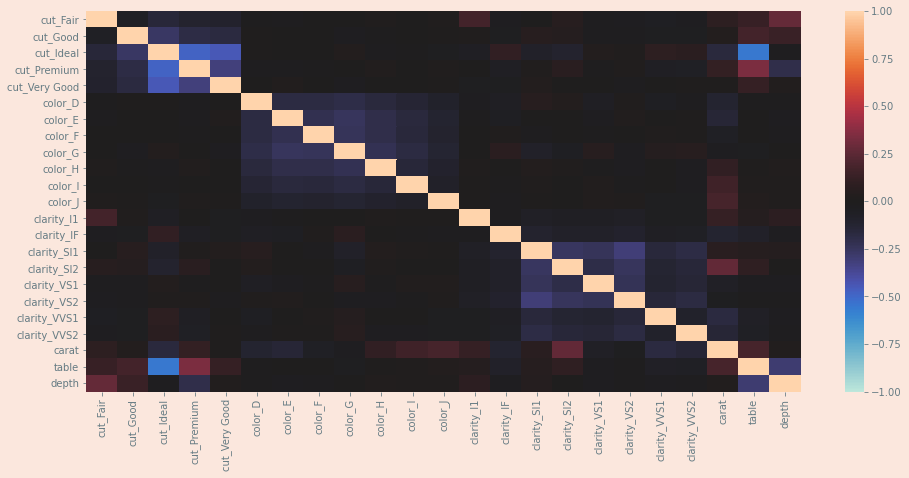

In [82]:
# correlation matrix

plt.figure(figsize = (16, 7), facecolor='#fbe7dd')
sns.heatmap(df_tran.corr(), vmin=-1, vmax=1, cmap= 'icefire')
plt.show()

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x=df_tran

In [85]:
type(x)

pandas.core.frame.DataFrame

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, shuffle=True, random_state=42)

In [87]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [88]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(53940, 23)
(40455, 23)
(13485, 23)
(40455,)
(13485,)


In [89]:
y_train=y_train.to_frame()
y_test=y_test.to_frame()

In [90]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(53940, 23)
(40455, 23)
(13485, 23)
(40455, 1)
(13485, 1)


### Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [92]:
# print the intercept
print(lin_reg.intercept_)

[1.21929488e+14]


In [93]:
pred = lin_reg.predict(x_test)

In [94]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 799.6071190211346
MSE: 1325320.3210525077
RMSE: 1151.225573487884
R2 Square 0.9156367716334615
__________________________________
Train set evaluation:
_____________________________________
MAE: 806.272718529848
MSE: 1339846.3475345206
RMSE: 1157.5173206196616
R2 Square 0.9161731699965261
__________________________________


In [95]:
results = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results

Model         MAE           MSE         RMSE  R2 Square
0  Linear Regression  799.607119  1.325320e+06  1151.225573   0.915637

### Ridge Regression

In [96]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='auto', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 926.9181942088591
MSE: 2152241.961865277
RMSE: 1467.0521333154038
R2 Square 0.8629990974674766
__________________________________
Train set evaluation:
_____________________________________
MAE: 943.3243456265484
MSE: 2212110.2889719345
RMSE: 1487.3164723662326
R2 Square 0.8616004040434881
__________________________________


In [97]:
results1 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results = results.append(results1, ignore_index=True)
results

Model         MAE           MSE         RMSE  R2 Square
0  Linear Regression  799.607119  1.325320e+06  1151.225573   0.915637
1   Ridge Regression  926.918194  2.152242e+06  1467.052133   0.862999

### Lasso Regression

In [98]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True,  
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 799.4270173839012
MSE: 1326492.644010533
RMSE: 1151.7346239522944
R2 Square 0.9155621474480051
__________________________________
Train set evaluation:
_____________________________________
MAE: 806.2298500971403
MSE: 1341762.1280121366
RMSE: 1158.344563595883
R2 Square 0.91605331012997
__________________________________


In [99]:
results1 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results = results.append(results1, ignore_index=True)
results

Model         MAE           MSE         RMSE  R2 Square
0  Linear Regression  799.607119  1.325320e+06  1151.225573   0.915637
1   Ridge Regression  926.918194  2.152242e+06  1467.052133   0.862999
2   Lasso Regression  799.427017  1.326493e+06  1151.734624   0.915562

### Elastic Net Regression

In [100]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1686.7084856446718
MSE: 5696212.062046238
RMSE: 2386.6738491143356
R2 Square 0.6374077787979535
__________________________________
Train set evaluation:
_____________________________________
MAE: 1707.1114555755316
MSE: 5840982.865332449
RMSE: 2416.812542447686
R2 Square 0.63456177000713
__________________________________


In [101]:
results1 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results = results.append(results1, ignore_index=True)
results

Model          MAE           MSE         RMSE  R2 Square
0       Linear Regression   799.607119  1.325320e+06  1151.225573   0.915637
1        Ridge Regression   926.918194  2.152242e+06  1467.052133   0.862999
2        Lasso Regression   799.427017  1.326493e+06  1151.734624   0.915562
3  Elastic Net Regression  1686.708486  5.696212e+06  2386.673849   0.637408

### Polynomial Regression - Second Degree

In [102]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

x_train_2_d = poly_reg.fit_transform(x_train)
x_test_2_d = poly_reg.transform(x_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train_2_d,y_train)

test_pred = lin_reg.predict(x_test_2_d)
train_pred = lin_reg.predict(x_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 481.1486466444197
MSE: 601389.0853726362
RMSE: 775.4928016252867
R2 Square 0.9617185944103355
__________________________________
Train set evaluation:
_____________________________________
MAE: 481.7398838215301
MSE: 584520.4038561365
RMSE: 764.539340947303
R2 Square 0.9634297674373085
__________________________________


In [103]:
results1 = pd.DataFrame(data=[["Polynomial Regression Second Degree", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results = results.append(results1, ignore_index=True)
results

Model          MAE           MSE  \
0                    Linear Regression   799.607119  1.325320e+06   
1                     Ridge Regression   926.918194  2.152242e+06   
2                     Lasso Regression   799.427017  1.326493e+06   
3               Elastic Net Regression  1686.708486  5.696212e+06   
4  Polynomial Regression Second Degree   481.148647  6.013891e+05   

          RMSE  R2 Square  
0  1151.225573   0.915637  
1  1467.052133   0.862999  
2  1151.734624   0.915562  
3  2386.673849   0.637408  
4   775.492802   0.961719

### Polynomial Regression third degree

In [104]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)

x_train_3_d = poly_reg.fit_transform(x_train)
x_test_3_d = poly_reg.transform(x_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train_3_d,y_train)

test_pred = lin_reg.predict(x_test_3_d)
train_pred = lin_reg.predict(x_train_3_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13292435456333.95
MSE: 1.0000760632618883e+30
RMSE: 1000038030907769.1
R2 Square -6.36598141360038e+22
__________________________________
Train set evaluation:
_____________________________________
MAE: 352.99050797182053
MSE: 370736.09331355826
RMSE: 608.8810173700263
R2 Square 0.9768050780393331
__________________________________


In [105]:
results1 = pd.DataFrame(data=[["Polynomial Regression Third Degree", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results = results.append(results1, ignore_index=True)
results

Model           MAE           MSE  \
0                    Linear Regression  7.996071e+02  1.325320e+06   
1                     Ridge Regression  9.269182e+02  2.152242e+06   
2                     Lasso Regression  7.994270e+02  1.326493e+06   
3               Elastic Net Regression  1.686708e+03  5.696212e+06   
4  Polynomial Regression Second Degree  4.811486e+02  6.013891e+05   
5   Polynomial Regression Third Degree  1.329244e+13  1.000076e+30   

           RMSE     R2 Square  
0  1.151226e+03  9.156368e-01  
1  1.467052e+03  8.629991e-01  
2  1.151735e+03  9.155621e-01  
3  2.386674e+03  6.374078e-01  
4  7.754928e+02  9.617186e-01  
5  1.000038e+15 -6.365981e+22

### Stochastic Gradient Descent Regression 

In [106]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=10, penalty=None, eta0=0.0001, max_iter=1000)
sgd_reg.fit(x_train, y_train)

test_pred = sgd_reg.predict(x_test)
train_pred = sgd_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1765.4798496902868
MSE: 6170616.33920236
RMSE: 2484.0725309866375
R2 Square 0.6072095876617905
__________________________________
Train set evaluation:
_____________________________________
MAE: 1785.9588552548341
MSE: 6328741.5783133
RMSE: 2515.699023793049
R2 Square 0.6040453852059948
__________________________________


In [107]:
results1 = pd.DataFrame(data=[["Stochastic Gradient Descent Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results = results.append(results1, ignore_index=True)
results

Model           MAE           MSE  \
0                      Linear Regression  7.996071e+02  1.325320e+06   
1                       Ridge Regression  9.269182e+02  2.152242e+06   
2                       Lasso Regression  7.994270e+02  1.326493e+06   
3                 Elastic Net Regression  1.686708e+03  5.696212e+06   
4    Polynomial Regression Second Degree  4.811486e+02  6.013891e+05   
5     Polynomial Regression Third Degree  1.329244e+13  1.000076e+30   
6  Stochastic Gradient Descent Regressor  1.765480e+03  6.170616e+06   

           RMSE     R2 Square  
0  1.151226e+03  9.156368e-01  
1  1.467052e+03  8.629991e-01  
2  1.151735e+03  9.155621e-01  
3  2.386674e+03  6.374078e-01  
4  7.754928e+02  9.617186e-01  
5  1.000038e+15 -6.365981e+22  
6  2.484073e+03  6.072096e-01

### Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_train, y_train)

test_pred = rf_reg.predict(x_test)
train_pred = rf_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 283.52126941152574
MSE: 306797.99504491483
RMSE: 553.8934870937867
R2 Square 0.9804707821141566
__________________________________
Train set evaluation:
_____________________________________
MAE: 111.30426304768474
MSE: 43708.714369471774
RMSE: 209.06629180590488
R2 Square 0.9972653857094418
__________________________________


In [109]:
results1 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results = results.append(results1, ignore_index=True)
results

Model           MAE           MSE  \
0                      Linear Regression  7.996071e+02  1.325320e+06   
1                       Ridge Regression  9.269182e+02  2.152242e+06   
2                       Lasso Regression  7.994270e+02  1.326493e+06   
3                 Elastic Net Regression  1.686708e+03  5.696212e+06   
4    Polynomial Regression Second Degree  4.811486e+02  6.013891e+05   
5     Polynomial Regression Third Degree  1.329244e+13  1.000076e+30   
6  Stochastic Gradient Descent Regressor  1.765480e+03  6.170616e+06   
7                Random Forest Regressor  2.835213e+02  3.067980e+05   

           RMSE     R2 Square  
0  1.151226e+03  9.156368e-01  
1  1.467052e+03  8.629991e-01  
2  1.151735e+03  9.155621e-01  
3  2.386674e+03  6.374078e-01  
4  7.754928e+02  9.617186e-01  
5  1.000038e+15 -6.365981e+22  
6  2.484073e+03  6.072096e-01  
7  5.538935e+02  9.804708e-01

### Support Vector Machine Regression

In [110]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=100, epsilon=0.001)
svm_reg.fit(x_train, y_train)

test_pred = svm_reg.predict(x_test)
train_pred = svm_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 948.8389676059415
MSE: 3771689.0916288444
RMSE: 1942.0836984097375
R2 Square 0.7599132352305793
__________________________________
Train set evaluation:
_____________________________________
MAE: 967.2564430137927
MSE: 3885588.647176871
RMSE: 1971.1896527673007
R2 Square 0.7569000508232294
__________________________________


### Results using get_dummies

In [111]:
results1 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results = results.append(results1, ignore_index=True)
results

Model           MAE           MSE  \
0                      Linear Regression  7.996071e+02  1.325320e+06   
1                       Ridge Regression  9.269182e+02  2.152242e+06   
2                       Lasso Regression  7.994270e+02  1.326493e+06   
3                 Elastic Net Regression  1.686708e+03  5.696212e+06   
4    Polynomial Regression Second Degree  4.811486e+02  6.013891e+05   
5     Polynomial Regression Third Degree  1.329244e+13  1.000076e+30   
6  Stochastic Gradient Descent Regressor  1.765480e+03  6.170616e+06   
7                Random Forest Regressor  2.835213e+02  3.067980e+05   
8                          SVM Regressor  9.488390e+02  3.771689e+06   

           RMSE     R2 Square  
0  1.151226e+03  9.156368e-01  
1  1.467052e+03  8.629991e-01  
2  1.151735e+03  9.155621e-01  
3  2.386674e+03  6.374078e-01  
4  7.754928e+02  9.617186e-01  
5  1.000038e+15 -6.365981e+22  
6  2.484073e+03  6.072096e-01  
7  5.538935e+02  9.804708e-01  
8  1.942084e+03  7.599132e-01

### Resuls using Ordinal Encoding

In [117]:
results_df

Model    MAE    MSE   RMSE  R2 Square
0                    Linear Regression 1.0987 2.3040 1.5179     0.1538
1                     Ridge Regression 1.0996 2.3045 1.5181     0.1533
2                     Lasso Regression 1.1488 2.3776 1.5419    -0.0000
3               Elastic Net Regression 1.1467 2.3751 1.5411     0.0109
4  Polynomial Regression Second Degree 1.0886 2.2808 1.5102     0.1682
5   Polynomial Regression Third Degree 1.0822 2.2596 1.5032     0.1770
6  Polynomial Regression Fourth Degree 1.0812 2.2563 1.5021     0.1784
7                    Robust Regression 1.2673 3.3719 1.8363    -0.2422
8              Random Forest Regressor 1.0968 2.4975 1.5803     0.0893